# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import numpy as np

# Carregando os dados
tips = sns.load_dataset('tips')
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips['tip_pct'] = tips['tip'] / tips['net_bill']

# Regressão de tip por net_bill (como na aula)
reg1 = smf.ols('tip ~ net_bill', data=tips).fit()
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Sun, 08 Jun 2025   Prob (F-statistic):           5.02e-23
Time:                        17:49:23   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.0

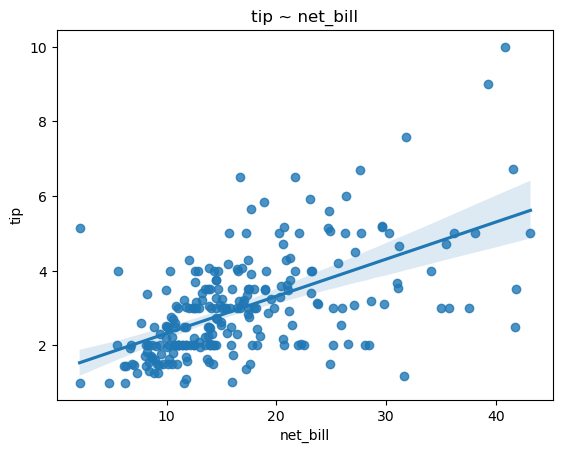

In [6]:
# Gráfico de dispersão
sns.regplot(x='net_bill', y='tip', data=tips)
plt.title('tip ~ net_bill')
plt.show()

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Sun, 08 Jun 2025   Prob (F-statistic):           1.52e-06
Time:                        17:58:31   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.0

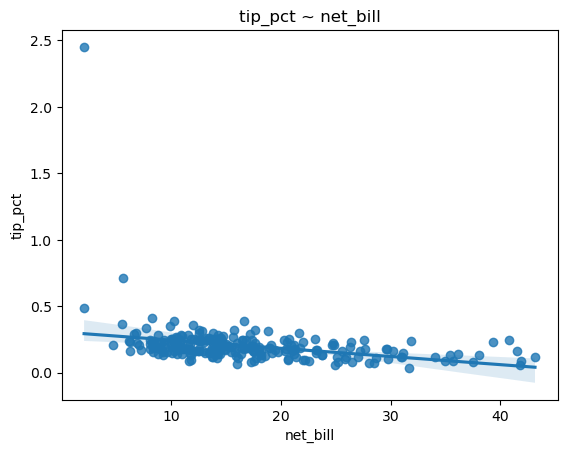

In [8]:
# Regressão de tip_pct por net_bill
reg2 = smf.ols('tip_pct ~ net_bill', data=tips).fit()
print(reg2.summary())

# Gráfico de dispersão
sns.regplot(x='net_bill', y='tip_pct', data=tips)
plt.title('tip_pct ~ net_bill')
plt.show()

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

Os dois gráficos mostram relações diferentes:

No primeiro (tip ~ net_bill), vemos uma relação positiva clara - quanto maior a conta, maior a gorjeta em valor absoluto.

No segundo (tip_pct ~ net_bill), observamos uma relação negativa - quanto maior a conta, menor a porcentagem da gorjeta.

Não podemos comparar diretamente os R² dos dois modelos porque eles estão modelando variáveis dependentes diferentes (tip vs tip_pct) em escalas diferentes.

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [11]:
# Obtendo valores preditos
tips['pred_tip_pct'] = reg2.fittedvalues
tips['pred_tip'] = tips['pred_tip_pct'] * tips['net_bill']

# Calculando R² para tip
r2_tip = np.corrcoef(tips['tip'], tips['pred_tip'])[0,1]**2
print(f"R² para tip: {r2_tip:.4f}")

# Comparando com o R² do item 1
print(f"R² do modelo original (tip ~ net_bill): {reg1.rsquared:.4f}")
print(f"Diferença: {reg1.rsquared - r2_tip:.4f}")

R² para tip: 0.1211
R² do modelo original (tip ~ net_bill): 0.3325
Diferença: 0.2114
